In [40]:
# Import
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning) # avoid warning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from matplotlib.patches import Patch
from itertools import combinations
import seaborn as sns

## Data Inspection

In [2]:
train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN


## Data Prep

In [30]:
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [5]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0


In [6]:
y_train

array([2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2])

## Data Exploration

In the following table, we group the data by sex and calculate the mean body mass for each sex. We can see from the result that the mean body mass of the male penguins is substantially higher than the mean body mass of the female penguins.

In [46]:
X_train.groupby(['Sex_MALE'])[['Body Mass (g)']].aggregate([np.mean,len ]).round(2)

Body Mass (g)     
                  mean  len
Sex_MALE                   
0              3823.21  126
1              4613.08  130

In the subsequent pair chart, we inspect the correlation between each pair of features. We can see that the culmen length, the culmen depth, the flipper length, and the body mass are in general positively correlated with each other. It also seems like if we were to differentiate the species, Delta 15 N would be a good measurement because the means of the three clusters are more distinctly separated compared to that separation in other features.

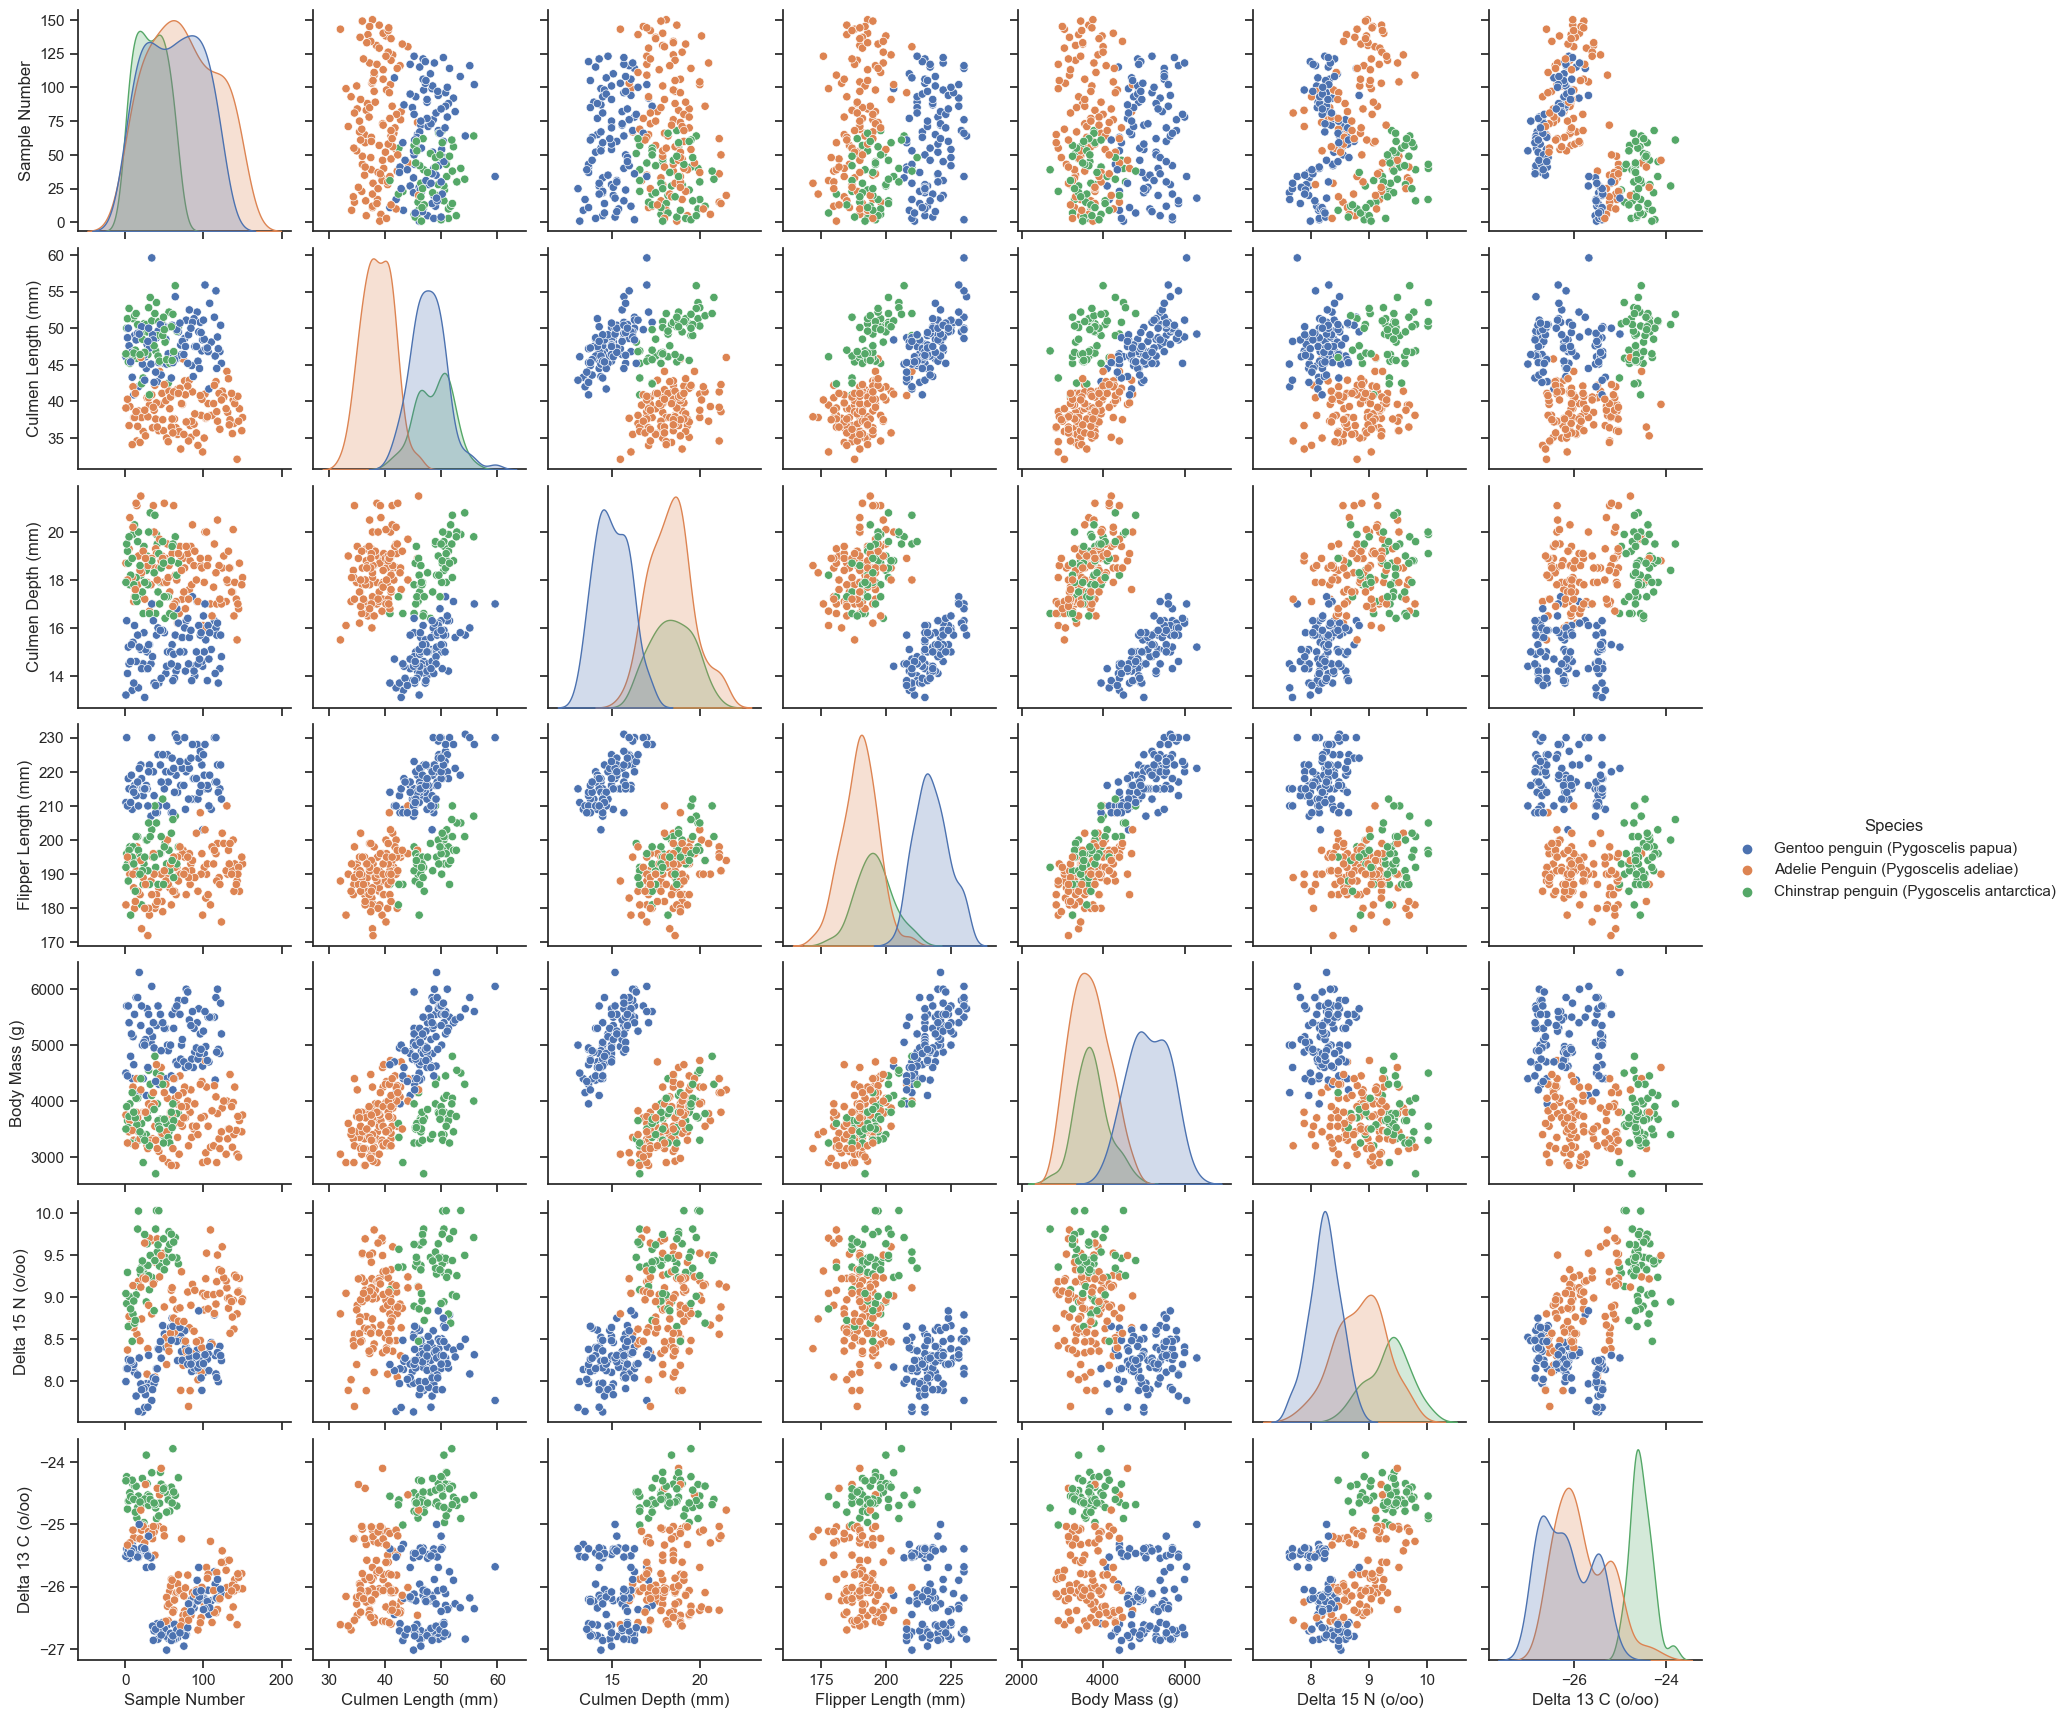

In [45]:
sns.set_theme(style="ticks")
sns.pairplot(train, hue="Species")

## Choosing Features 

In the following chunk of code, we loop through three models (logistic regression, support vector machine, and random forest) as well as the groups of features to determine what are the best three features (2 quantitative and 1 qualitative) to determine the species. The skeleton of the code is based on the blog instruction (https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-penguins.html#your-challenge).

In [7]:
# Scale the model to prevent warnings
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Search for the best columns witht the largest cross validation score
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

# Create a dictionary to store the models of interest
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(gamma = 0.01),
    "Random Forest": RandomForestClassifier()  
}

# Initiate an empty array for the best cols, the score, and the best model
best_cols = None
best_score = 0
best_model = None

# Main loop to iterate through the feature groups
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    for qual in all_qual_cols: 
        qual_cols = [col for col in X_train.columns if qual in col]
        for pair in combinations(all_quant_cols, 2):
            cols =  list(pair) + qual_cols
            # print(cols)
            X_subset = X_train[cols]
            scores = cross_val_score(model, X_subset, y_train, cv=5) # You can modify the cv parameter as needed
            mean_score = scores.mean()
            if mean_score > best_score:
                best_cols = cols
                best_score = mean_score
                best_model = model_name
            
    print(f"The best score for {model_name} was {best_score} and the best columns were {best_cols}")
    
print(f"The best model was {best_model} with a score of {best_score} and the best columns were {best_cols}")

Evaluating Logistic Regression...
The best score for Logistic Regression was 0.996078431372549 and the best columns were ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
Evaluating SVC...
The best score for SVC was 0.996078431372549 and the best columns were ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
Evaluating Random Forest...
The best score for Random Forest was 0.996078431372549 and the best columns were ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
The best model was Logistic Regression with a score of 0.996078431372549 and the best columns were ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']


## Model Choices

### Logistic Regression

In [8]:
# Train/Fit & Calculate training score
LR = LogisticRegression()
LR.fit(X_train[best_cols], y_train)
LR_train_score = LR.score(X_train[best_cols], y_train)
print(f"{LR_train_score=}")

LR_train_score=1.0


### Other Models

#### Decision Tree

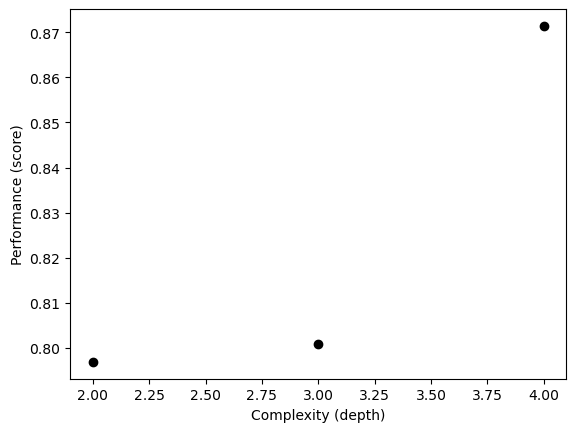

In [9]:
# Use cross validation to find the best depth and plug back to the "Choosing Features" chunk
np.random.seed(12345)

fig, ax = plt.subplots(1)

for d in range(2, 5):
    T = DecisionTreeClassifier(max_depth = d)
    m = cross_val_score(T, X_train[cols], y_train, cv = 10).mean()
    ax.scatter(d, m, color = "black")
    # ax.scatter(d, T.score(X_test, y_test), color = "firebrick")

labs = ax.set(xlabel = "Complexity (depth)", ylabel = "Performance (score)")

DTC_train_score=0.9921875


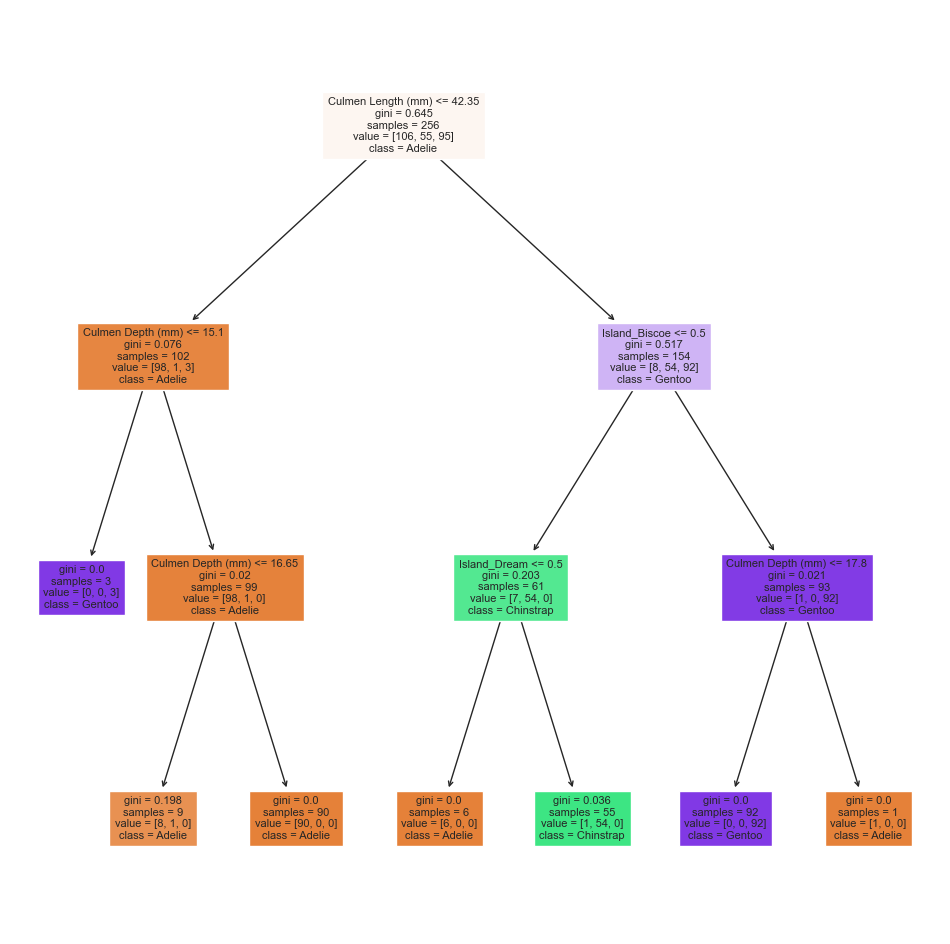

In [52]:
# Train/Fit & Calculate training score
DTC = DecisionTreeClassifier(max_depth = 3)
DTC.fit(X_train[best_cols], y_train)
DTC_train_score = DTC.score(X_train[best_cols], y_train)
print(f"{DTC_train_score=}")

# Show the decision tree plot
plt.figure(figsize=(12,12))
p = plot_tree(DTC, feature_names = best_cols, filled = True, class_names = species, fontsize=8)
plt.show()

#### Random Forest

In [11]:
# Train/Fit & Calculate training score
rf = RandomForestClassifier()
rf.fit(X_train[best_cols], y_train)
rf_train_score = rf.score(X_train[best_cols], y_train)
print(f"{rf_train_score=}")

rf_train_score=1.0


#### SVC

In [12]:
# Use grid search to find the best gamma and plug back to the "Choosing Features" chunk
param_grid = {'gamma': np.logspace(-5, 5, num=11)}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best gamma:", grid_search.best_params_['gamma'])
print("Best score:", grid_search.best_score_)

Best gamma: 0.01
Best score: 0.7730769230769232


In [13]:
# Train/Fit & Calculate training score
svc_best = SVC(gamma = 0.01)
svc_best.fit(X_train[best_cols], y_train)
svc_train_score = svc_best.score(X_train[best_cols], y_train)
print(f"{svc_train_score=}")

svc_train_score=0.98046875


## Testing

In [14]:
# Get the test data
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

# LR
LR.fit(X_train[best_cols], y_train)
LR_score = LR.score(X_test[best_cols], y_test)
print("LR test score:", LR_score)

# Decision Tree
DTC.fit(X_train[best_cols], y_train)
DTC_score = DTC.score(X_test[best_cols], y_test)
print("Decision Tree test score:", DTC_score)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train[best_cols], y_train)
rf_score = rf.score(X_test[best_cols], y_test)
print("Random Forest test score:", rf_score)

# SVC
svc_best = SVC(gamma=0.01)
svc_best.fit(X_train[best_cols], y_train)
svc_score = svc_best.score(X_test[best_cols], y_test)
print("SVC test score:", svc_score)

LR test score: 1.0
Decision Tree test score: 0.9852941176470589
Random Forest test score: 0.9852941176470589
SVC test score: 0.9264705882352942


## Plotting Decision Regions

In [53]:
# The skeleton of the code is based on the blog instruction (https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-penguins.html#your-challenge).
def plot_regions(model, X, y, model_name):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # add the title
    fig.suptitle(model_name + " Decision Boundaries", fontsize=14)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })
    
      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

### Decision Boundaries for Training Data

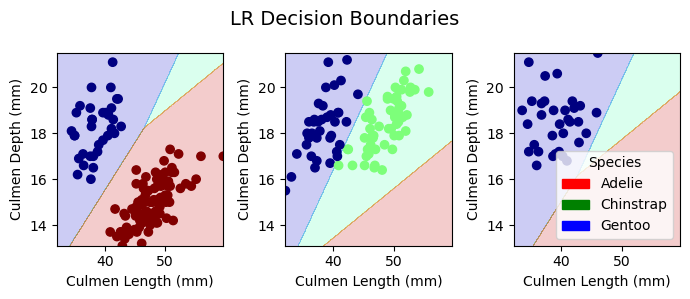

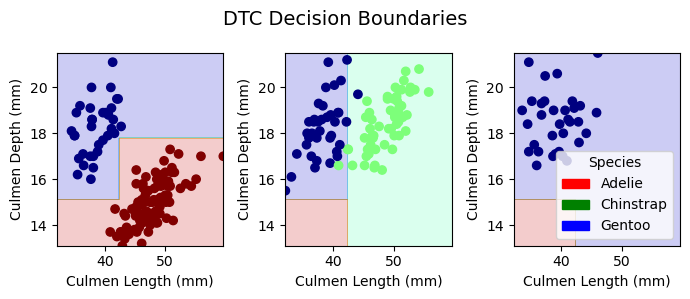

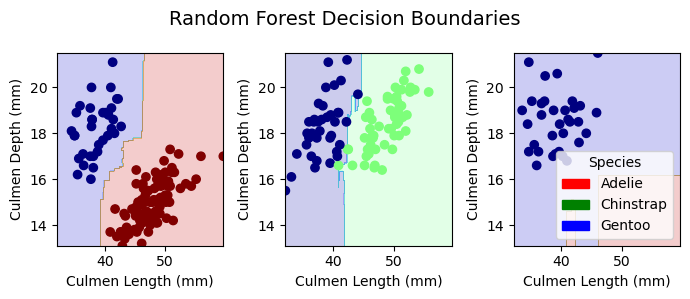

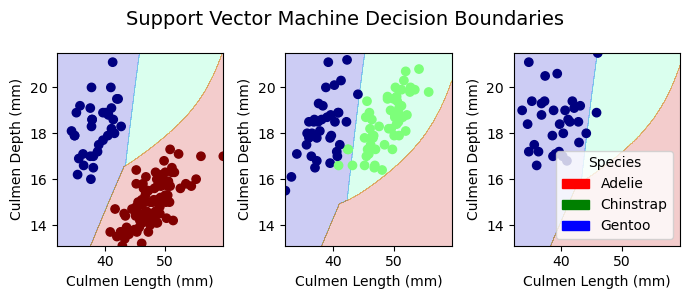

In [28]:
plot_regions(LR, X_train[best_cols], y_train, model_name = "LR")
plot_regions(DTC, X_train[best_cols], y_train, model_name = "DTC")
plot_regions(rf, X_train[best_cols], y_train, model_name = "Random Forest")
plot_regions(svc_best, X_train[best_cols], y_train, model_name = "Support Vector Machine")

### Decision Boundaries for Testing Data

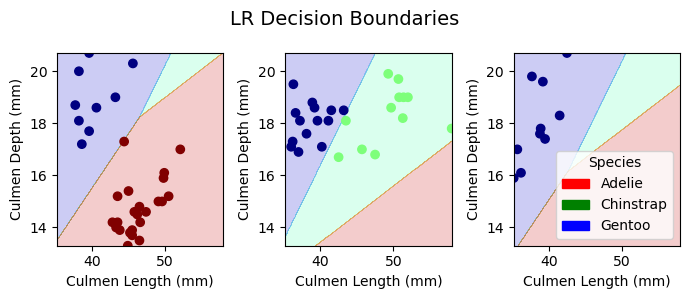

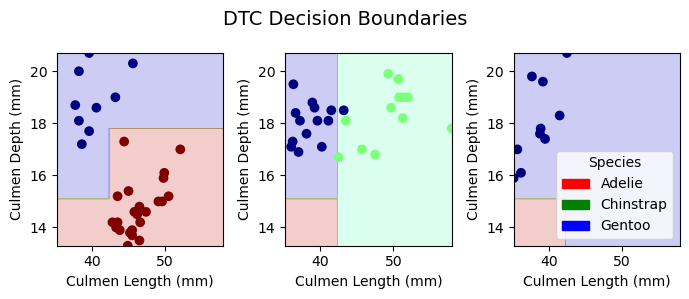

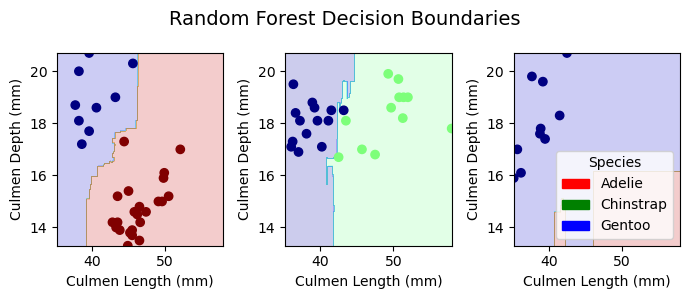

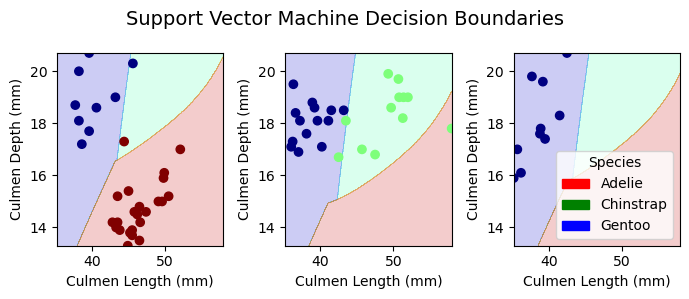

In [29]:
plot_regions(LR, X_test[best_cols], y_test, model_name = "LR")
plot_regions(DTC, X_test[best_cols], y_test, model_name = "DTC")
plot_regions(rf, X_test[best_cols], y_test, model_name = "Random Forest")
plot_regions(svc_best, X_test[best_cols], y_test, model_name = "Support Vector Machine")